# LAB3 e LAb4: PCA, LDA e modelos polinomiais

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: 
## Número: 

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab3e4.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

## Considere o ficheiro pickle $\texttt{Lab3e4Data.p}$
### Neste ficheiro encontra-se um dicionário de Python com as seguintes variáveis:
### 1. "X":             dados bi-dimensionais (840 amostras)
### 2. "y":              classe dos dados (inteiros de 0 a 3)
### 3. "foldTrain": array boleano indicando os dados a serem usados para treinar os classificadores
### 3. "foldTest": array boleano indicando os dados a serem usados para testar os classificadores


# Pergunta 1 - Discriminantes polinomiais:
## 1. Use os dados de treino para estimar discriminante polinomial de 4ª ordem.
## 2. Calcule as matrizes de confusão e o número total de erros nos dados de treino e de teste. Imprima os resultados.
## 3. Faça um "plot" dos dados de teste por classe, e dos erros do discriminante polinomial.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
D=pickle.load(open('Lab3e4Data.p','rb'))
print(D.keys())

dict_keys(['X', 'y', 'foldTrain', 'foldTest'])


In [2]:
from sklearn.preprocessing import PolynomialFeatures
X=D['X']
y=D['y']
f1=D['foldTrain']
f2=D['foldTest']
X1=X[:,f1]
y1=y[f1]
X2=X[:,f2]
y2=y[f2]
Y1=-np.ones((4,y1.shape[0]))
for i in range(4):
    Y1[i,y1==i]=1
poly=PolynomialFeatures(degree=4).fit(X1.T)
X1b=poly.transform(X1.T).T
X2b=poly.transform(X2.T).T
Rx=np.dot(X1b,X1b.T)
rxy=np.dot(X1b,Y1.T)
W=np.dot(np.linalg.pinv(Rx),rxy)

In [3]:
y1e=np.argmax(np.dot(W.T,X1b),axis=0)
print('Nº erros no treino:',np.sum(y1!=y1e))
print(confusion_matrix(y1,y1e))

y2e=np.argmax(np.dot(W.T,X2b),axis=0)
print('Nº erros no teste:',np.sum(y2!=y2e))
print(confusion_matrix(y2,y2e))

Nº erros no treino: 5
[[53  0  0  0]
 [ 0 60  0  0]
 [ 0  0 53  0]
 [ 0  0  5 47]]
Nº erros no teste: 32
[[160   0   0   0]
 [  2 184   3   0]
 [  0   0 124   0]
 [  1   0  26 122]]


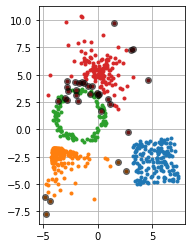

In [4]:
plt.plot(X2[0,y2==0],X2[1,y2==0],'.')
plt.plot(X2[0,y2==1],X2[1,y2==1],'.')
plt.plot(X2[0,y2==2],X2[1,y2==2],'.')
plt.plot(X2[0,y2==3],X2[1,y2==3],'.')
plt.plot(X2[0,y2!=y2e],X2[1,y2!=y2e],'ok',alpha=.5)
plt.axis('scaled')
plt.grid(True)

<hr style="border:2px solid black"> </hr>

# Pergunta 2 - Conjunto de dados $\texttt{MNISTsmall.p}$:
## 1. Com os dados de treino calcule a matriz de PCA. Use o número mínimo de componentes principais de modo aos dados projetados terem 75% da variância total dos dados originais. Especifique (imprima) qual o número de componentes obtidas. 
## 2. Transforme os conjuntos de treino e teste com a transformação da alínea anterior.
## 3. Para os dados transformados aplique a transformação LDA usando a função $\texttt{LinearDiscriminantAnalysis}$ do $\texttt{sklearn}$.
## 4.  Use o classificador da alínea anterior e calcule as matrizes de confusão e o número total de erros nos dados de treino e de teste. Imprima os resultados.

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
D=pickle.load(open('MNISTsmall.p','rb'))
D.keys()

dict_keys(['foldTrain', 'trueClass', 'foldTest', 'X'])

In [73]:
X=D['X']*1.
y=D['trueClass']
f1=D['foldTrain']
f2=D['foldTest']
X1=X[:,f1]
y1=y[f1]
X2=X[:,f2]
y2=y[f2]

Cx=np.cov(X1)
u,V=np.linalg.eig(Cx)
u=u.real
V=V.real
idx=np.argsort(-u)
u=u[idx]
V=V[:,idx]
un=u/np.sum(u)
uc=np.cumsum(un)
print('Nº de componentes principais:',np.sum(uc<=.75))
print('Percentagem da variância total dos dados:',uc[32])

Nº de componentes principais: 32
Percentagem da variância total dos dados: 0.7529636562502181


In [65]:
W=V[:,:32]
X1p=np.dot(W.T,X1)
X2p=np.dot(W.T,X2)

In [66]:
lda=LDA().fit(X1p.T,y1)

X1pp=lda.transform(X1p.T).T
X2pp=lda.transform(X2p.T).T
print(X1pp.shape,X2pp.shape)

(9, 10000) (9, 5000)


In [67]:
y1e=lda.predict(X1p.T)
y2e=lda.predict(X2p.T)
print('Treino:')
print('Nº de erros:',np.sum(y1!=y1e))
print(confusion_matrix(y1,y1e))
print('Teste:')
print('Nº de erros:',np.sum(y2!=y2e))
print(confusion_matrix(y2,y2e))

Treino:
Nº de erros: 1423
[[914   0   6   7   2  35  20   2  10   4]
 [  0 965   3   0   1   9   0   2  17   3]
 [  9  57 801  23  20   8  19  13  36  14]
 [  0  25  31 816   1  53   9  21  17  27]
 [  0  10   7   0 847   4  12   1  10 109]
 [ 15  10   4  54  12 831  19   3  39  13]
 [ 10  19   8   1  13  31 913   0   5   0]
 [  4  33   7   5  31   2   0 860   3  55]
 [  9  50  12  43  11  59  12   4 771  29]
 [  9  10   5  10  47  11   2  37  10 859]]
Teste:
Nº de erros: 899
[[458   0   1   1   1  19  17   0   3   0]
 [  0 483   2   3   1   3   2   1   5   0]
 [  4  46 368  18   7   3   7  15  29   3]
 [  2   5   7 402   2  44   5  14  12   7]
 [  1   4   3   0 395   3   9   1   5  79]
 [ 10   4   0  29  11 396  13   8  16  13]
 [ 11  10   3   0  15  28 427   1   3   2]
 [  1  40  13   2  13   1   0 394   5  31]
 [  6  29   4  27  10  36   5  10 360  13]
 [  4  11   3   9  26  10   2  14   3 418]]
